In [1]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename:
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        # print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


# print(X_train)
# print(len(y_train))
# print(X_test)
# print(len(y_test))



3406
1704


In [3]:
import matplotlib.pyplot as plt

TypeError: Invalid shape (16384,) for image data

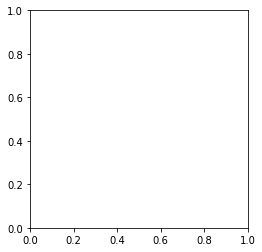

In [4]:
image = X_train[1]
plt.imshow(image)
plt.show()

In [5]:
# Reshape
X_train = X_train.reshape((len(X_train),64, 64,4))
X_test = X_test.reshape((len(X_test),64, 64,4)) 


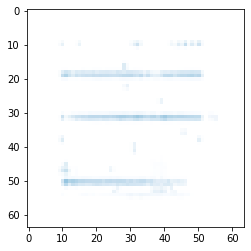

In [6]:
image = X_train[1]
plt.imshow(image)
plt.show()

In [7]:
# Normalisation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

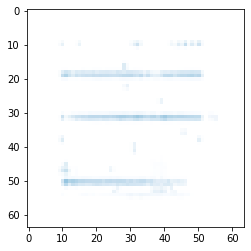

In [8]:
image = X_train[1]
plt.imshow(image)
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
import tensorflow as tf
#importeer Tensorflow namespaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
#K.set_image_dim_ordering('tf')

###### Voor Tensorflow-GPU ########

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:

# Model with parameters 
#-----------------------------------------------
batch_size = 32 # 
epochs = 20 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 2
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols,4)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax')) # relu nog eens testen

### ADAPT : welkeen van de twee? 
# 1
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
# 2
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

NameError: name 'ConfigProto' is not defined